In [1]:
# Open this notebook in ArcGIS Pro, then change the path below
src = "..\\"
# src = r'C:\Users\PATH_TO\ouroboros'

In [2]:
import os
import sys
from pprint import pprint

sys.path.append(os.path.join(src, 'src'))
from ouroboros import ouroboros as ob  # noqa
test_points = ob.FeatureClass(os.path.join(src, r'tests\test_data.gdb\test_points'), in_memory=True)

In [3]:
test_points.get_fields()

['OBJECTID', 'Shape', 'textfield']

In [4]:
desc = test_points.describe()
desc

{'catalogPath': 'memory\\fc_1909da95_51ad_42c8_a17b_dbd0b4a58973',
 'FIDSet': None,
 'workspace': <geoprocessing describe data object at 0x14af3b8bbb0>,
 'supportsBigObjectID': True,
 'supportsBigInteger': True,
 'supportsTimeOnly': True,
 'supportsDateOnly': True,
 'supportsTimestampOffset': True,
 'aliasName': '',
 'areaFieldName': '',
 'attributeRules': [],
 'baseName': 'fc_1909da95_51ad_42c8_a17b_dbd0b4a58973',
 'canVersion': False,
 'changeTracked': False,
 'children': [],
 'childrenExpanded': True,
 'createdAtFieldName': '',
 'creatorFieldName': '',
 'dataElementType': 'DEFeatureClass',
 'datasetType': 'FeatureClass',
 'dataType': 'FeatureClass',
 'defaultSubtypeCode': -1,
 'DSID': -1,
 'editedAtFieldName': '',
 'editorFieldName': '',
 'editorTrackingEnabled': False,
 'extension': '',
 'extensionProperties': {},
 'extent': <Extent object at 0x14af2a77650[0x14af22a7cf0]>,
 'featureType': 'Simple',
 'fields': [<Field object at 0x14af2a776d0[0x14af3b8baf0]>,
  <Field object at 0x14a

In [5]:
desc['shapeType']

'Point'

In [6]:
for pt in test_points[10:15]:
    print(pt)

(11, 'POINT (27.016354473000035 -66.411916128999962)', 'feature 11')
(12, 'POINT (-117.10998434099997 71.150833555000077)', 'feature 12')
(13, 'POINT (59.09852128600005 -11.900799981999967)', 'feature 13')
(14, 'POINT (15.050394674000074 48.019017763000079)', 'feature 14')
(15, 'POINT (-165.90201799399998 -26.356387249999955)', 'feature 15')


In [7]:
idx = test_points.index_field('textfield')
for pt in test_points[10:15]:
    print(pt[idx])

feature 11
feature 12
feature 13
feature 14
feature 15


In [8]:
h = test_points.head()

((1, 'POINT (131.66847018300007 -4.8363037029999418)', 'feature 1'),
 (2, 'POINT (46.930818324000029 26.16624910400003)', 'feature 2'),
 (3, 'POINT (129.20270544400012 -43.696779123999931)', 'feature 3'),
 (4, 'POINT (-89.230861218999962 -74.249282888999971)', 'feature 4'),
 (5, 'POINT (26.79647895100004 -8.4357316419999506)', 'feature 5'),
 (6, 'POINT (-137.54684776999994 -61.157839707999983)', 'feature 6'),
 (7, 'POINT (83.920377479000081 6.0000919180000665)', 'feature 7'),
 (8, 'POINT (-171.20806883499998 76.735286899000073)', 'feature 8'),
 (9, 'POINT (170.76041139100005 79.383183010000039)', 'feature 9'),
 (10, 'POINT (-155.67660059999997 -32.50517528499995)', 'feature 10'))


In [9]:
test_points.get_oid(10)

11

In [10]:
test_points.index(10)

9

In [11]:
test_points.sort('textfield', ascending=False)
k = test_points.head(5, silent=True)
pprint(h, compact=True)

((1, 'POINT (29.813696252000057 -50.548722855999983)', 'feature 999', 999),
 (2, 'POINT (-60.047962019999943 50.461756773000047)', 'feature 998', 998),
 (3, 'POINT (108.05178769800006 -56.516986600999985)', 'feature 997', 997),
 (4, 'POINT (-127.29392042999996 -69.817644170999984)', 'feature 996', 996),
 (5, 'POINT (-29.797030745999962 69.724193700000058)', 'feature 995', 995))


In [12]:
r = reversed(test_points)
for i in r:
    print(i)
    break

(1051, 'POINT (131.66847018300007 -4.8363037029999418)', 'feature 1', 1)


In [13]:
len(test_points)

1051

In [14]:
p = test_points.pop()
len(test_points)

1050

In [15]:
test_points.remove(1)
len(test_points)

1049

In [16]:
test_points.to_geojson()

{"features": [{"geometry": {"coordinates": [-60.047962, 50.461757], "type": "Point"}, "id": 2, "properties": {"ORIG_FID": 998, "textfield": "feature 998"}, "type": "Feature"}, {"geometry": {"coordinates": [108.051788, -56.516987], "type": "Point"}, "id": 3, "properties": {"ORIG_FID": 997, "textfield": "feature 997"}, "type": "Feature"}, {"geometry": {"coordinates": [-127.29392, -69.817644], "type": "Point"}, "id": 4, "properties": {"ORIG_FID": 996, "textfield": "feature 996"}, "type": "Feature"}, {"geometry": {"coordinates": [-29.797031, 69.724194], "type": "Point"}, "id": 5, "properties": {"ORIG_FID": 995, "textfield": "feature 995"}, "type": "Feature"}, {"geometry": {"coordinates": [-144.020449, -53.692121], "type": "Point"}, "id": 6, "properties": {"ORIG_FID": 994, "textfield": "feature 994"}, "type": "Feature"}, {"geometry": {"coordinates": [83.372338, -41.683123], "type": "Point"}, "id": 7, "properties": {"ORIG_FID": 993, "textfield": "feature 993"}, "type": "Feature"}, {"geometry

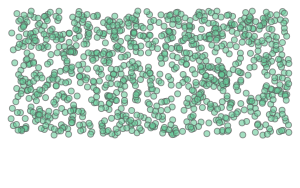

In [17]:
test_points.to_shapely()

In [18]:
out_path = ob.get_memory_path()
test_points.save(out_path)
test_points.clear()
len(test_points)

0

In [19]:
out = ob.FeatureClass(out_path)
len(out)

1049